<a href="https://colab.research.google.com/github/jongheonleee/LLM_study/blob/main/test_tokenization%E2%9C%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 스스로 알게된 사실들
> 1. 어떻게 임베딩 인스턴스(nn.Embedding())는 토큰 객체의 참조 없이 임베딩 벡터를 계산해낼 수 있는가?
> - 임베딩 인스턴스는 토큰 자체를 다루지 않고, 토큰의 정수 인덱스 만으로 해당 토큰의 임베딩 벡터를 찾음
> 2. 위의 질문에 연이어서 생각해보면, 추후에 LLM 작업을 하려면 해당 토큰이 갖는 의미를 알아야 하는데, 토큰 자체 정보 없이 그 토큰에게 부여된 정수 인덱스만으로 임베딩 벡터를 만들면 LLM 작업을 못하게 되는 것이 아닌가?
> - 임베딩 벡터는 처음엔 의미가 없지만, 학습을 통해 의미를 갖게됨. 즉, 토큰 자체 정보 없이 정수 인덱스만으로 임베딩 벡터를 만들 수 있음.
> - 왜냐하면, LLM은 이 벡터들을 훈련 데이터 기반으로 의미를 학습하기 때문
> - 학습 과정에서 수 많은 문장을 보며 특정 토큰 끼리의 연관성을 따져서 비슷한 의미로 임베딩 벡터를 업데이트 시킴
> - 예시로, 수많은 문장, 예: "나는 사과를 먹었다", "나는 밥을 먹었다" 등을 보며 모델은 "나는" 다음에 "사과", "밥" 등이 자주 나오네?
→ "먹는다"라는 맥락에서 함께 등장하는 단어들끼리 비슷한 의미로 임베딩 벡터가 업데이트됩니다.
> - 학습 이후에는 특정 토큰 간의 관계를 따짐. A와 B 토큰은 임베딩 공간에서 가깝고 A와 C 토큰은 임베딩 공간에서 멀어짐
> - 이는 곧 토큰의 정수 인덱스만 있더라도, 그에 대응되는 임베딩 벡터를 학습하여 의미있는 공간으로 만든다는 것임


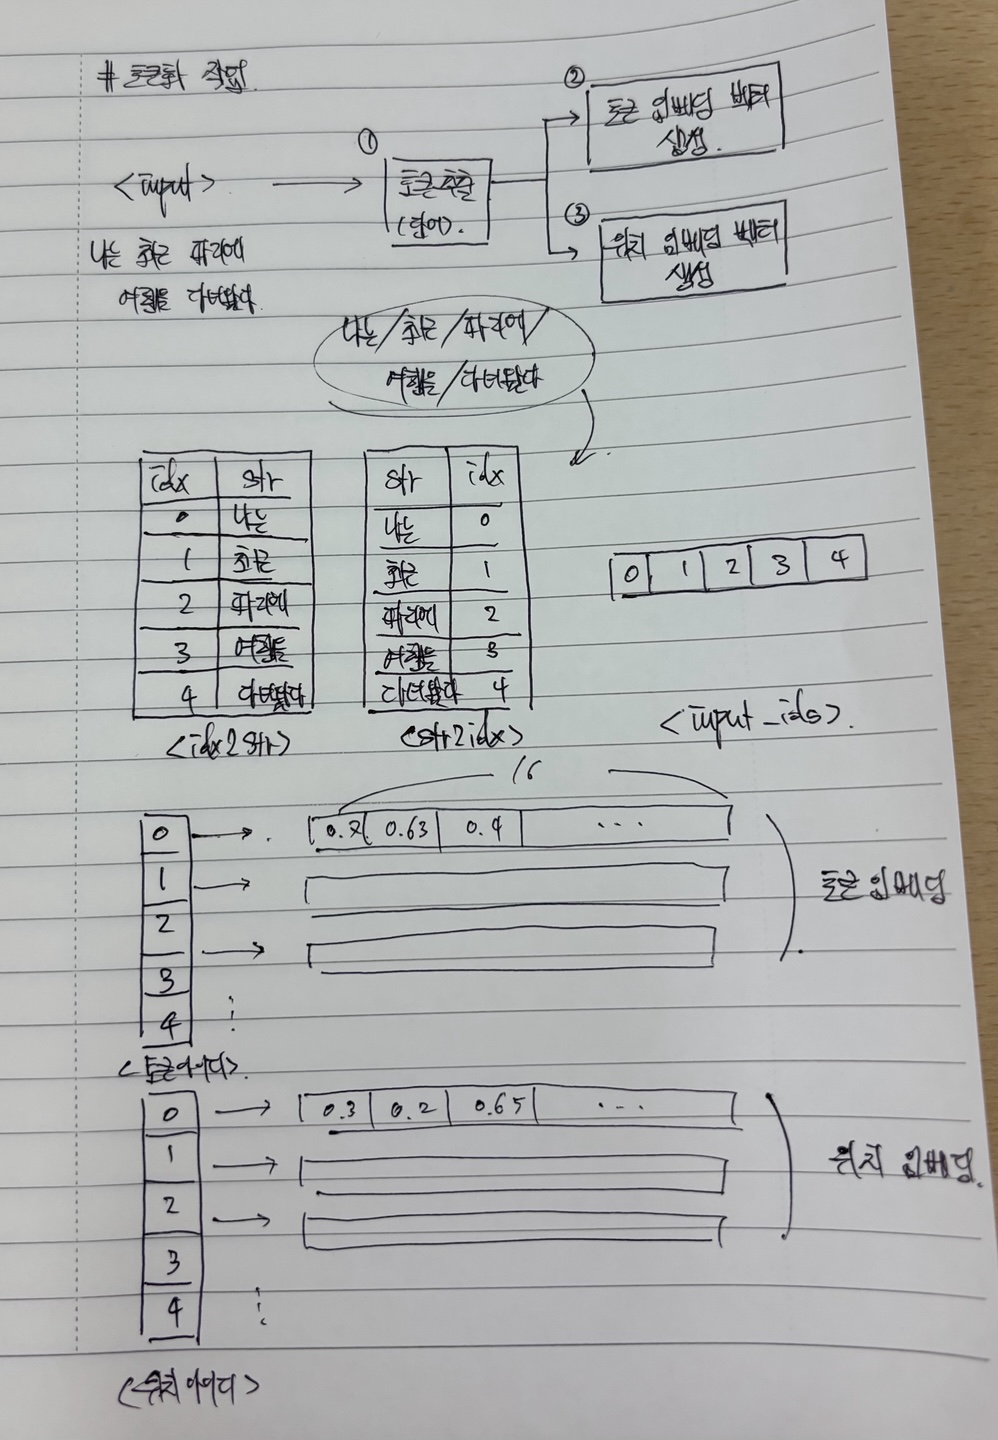

In [20]:
# > 1. 토큰 추출 <
input = '나는 최근 파리에 여행을 다녀왔다'
input_split = input.split()

str2idx = {token:idx for idx, token in enumerate(input_split)}
idx2str = {idx:token for idx, token in enumerate(input_split)}
input_ids = [str2idx[token] for token in input_split]

print(input_split)
print(idx2str)
print(str2idx)
print(input_ids)

['나는', '최근', '파리에', '여행을', '다녀왔다']
{0: '나는', 1: '최근', 2: '파리에', 3: '여행을', 4: '다녀왔다'}
{'나는': 0, '최근': 1, '파리에': 2, '여행을': 3, '다녀왔다': 4}
[0, 1, 2, 3, 4]


In [22]:
# > 2. 토큰 임베딩 벡터 생성 <
from torch import nn
import torch

embedding_dim = 16
embed_layer = nn.Embedding(len(str2idx), embedding_dim)

input_embeddings = embed_layer(torch.tensor(input_ids))
input_embeddings = input_embeddings.unsqueeze(0)
input_embeddings.shape

print(input_embeddings)

tensor([[[ 1.5210,  0.1838,  0.8674,  0.7581, -0.9852,  0.2967, -0.3748,
           2.0625, -1.0788, -0.0317,  0.8747, -1.1862,  1.0250,  2.3938,
           0.6485,  0.2150],
         [-0.4262,  0.7371, -0.1088,  1.0892,  0.7363, -0.2613,  0.2351,
          -0.3355, -0.4464, -0.1643, -0.8776, -0.2697, -0.7310,  1.0072,
          -1.5281,  0.6631],
         [-0.1208,  0.9759,  1.2839, -0.1370,  0.8552, -1.2262,  0.4607,
          -0.1796,  0.4169, -1.6340, -0.0575,  0.0086,  2.0983, -0.7278,
           0.6621, -0.3740],
         [-1.2002,  0.7598,  0.8101, -1.4676, -0.2936, -0.8355,  0.0665,
          -0.4247, -1.9849,  1.6548,  0.3988,  1.3068, -0.8968,  0.2941,
          -0.2224, -1.7522],
         [-1.4811,  0.7706,  0.7339, -0.2943,  1.0787,  0.0154,  0.2549,
           1.5011, -0.7270, -0.2553,  1.0877, -0.7484, -0.3981,  0.3469,
           0.8583, -1.0767]]], grad_fn=<UnsqueezeBackward0>)


In [27]:
# > 3. 위치 임베딩 벡터 생성(절대적 위치 인코딩) <

embedding_dim = 16
max_position = 12

embed_layer = nn.Embedding(len(str2idx), embedding_dim)
position_embed_layer = nn.Embedding(max_position, embedding_dim)

position_ids = torch.arange(len(input_ids), dtype=torch.long).unsqueeze(0)
position_encoding = position_embed_layer(position_ids)

token_embeddings = embed_layer(torch.tensor(input_ids))
token_embeddings = token_embeddings.unsqueeze(0)

input_embeddings = token_embeddings + position_encoding
input_embeddings.shape


tensor([[[-1.4883,  0.1013,  0.9762,  0.3341,  0.9670,  0.5218, -0.0059,
           0.2261, -0.2833,  0.4693,  1.6819, -1.4613,  0.5408, -1.1581,
           1.2241,  0.7720],
         [ 0.3405,  0.1446, -1.1677, -1.3918,  0.4223, -0.7881, -2.2761,
          -1.3379,  1.4496, -0.4774,  0.2206,  0.2028,  0.4309,  0.2466,
          -0.1408, -1.9965],
         [-0.5878, -0.3067, -0.9203,  0.6350, -1.6357, -0.1112, -0.1729,
          -0.3297,  1.0569,  0.9149, -0.3833,  0.4816,  0.7745, -0.6298,
          -0.1591,  0.6687],
         [ 1.2129,  0.9175,  0.1521, -0.4484,  1.0830, -0.2049,  1.4612,
           0.8775, -0.8492, -0.4617, -0.3383, -0.6705,  1.1552,  0.2999,
           0.8778,  0.8828],
         [-1.8609, -0.4989,  0.8802, -1.8361,  0.5023,  1.2077,  0.8159,
           0.0312,  1.5602,  0.4190,  0.2531, -0.2658, -0.5057, -0.5001,
           1.3552, -1.0413]]], grad_fn=<UnsqueezeBackward0>)


torch.Size([1, 5, 16])